## Exploratory Data Analysis 

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
train_data = pd.read_csv("Data/train.csv")
test_data = pd.read_csv("Data/test.csv")

In [54]:
print(train_data.shape)
print(test_data.shape)

(159256, 24)
(106171, 23)


Little preprocessing

In [55]:
def reduce_features(df):
    df['eyesight_diff'] = (df['eyesight(left)'] - df['eyesight(right)'])

    # Calculate the mean of left and right hearing
    df['hearing_diff'] = (df['hearing(left)'] - df['hearing(right)'])

    # Drop the original columns
    df = df.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis=1)

    return df

train_data = reduce_features(train_data)
test_data = reduce_features(test_data)

In [56]:
test_id = test_data['id']
train_data = train_data.drop(columns=['id', 'waist(cm)'])
test_data = test_data.drop(columns=['id', 'waist(cm)'])

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   systolic             159256 non-null  int64  
 4   relaxation           159256 non-null  int64  
 5   fasting blood sugar  159256 non-null  int64  
 6   Cholesterol          159256 non-null  int64  
 7   triglyceride         159256 non-null  int64  
 8   HDL                  159256 non-null  int64  
 9   LDL                  159256 non-null  int64  
 10  hemoglobin           159256 non-null  float64
 11  Urine protein        159256 non-null  int64  
 12  serum creatinine     159256 non-null  float64
 13  AST                  159256 non-null  int64  
 14  ALT                  159256 non-null  int64  
 15  Gtp              

In [58]:
train_data.nunique()

age                     18
height(cm)              14
weight(kg)              28
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
eyesight_diff           90
hearing_diff             3
dtype: int64

In [63]:
y = train_data['smoking']

In [64]:
test_data.head()

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,eyesight_diff,hearing_diff
0,40,165,70,130,89,107,200,186,49,115,14.2,1,0.9,19,25,32,0,0.0,0
1,80,160,60,144,72,93,172,158,35,104,13.0,1,1.1,20,12,24,0,0.0,0
2,60,170,70,117,75,92,161,173,39,88,15.4,1,1.4,38,60,36,0,-0.1,0
3,40,160,50,116,62,91,213,47,75,128,14.5,1,0.6,25,18,10,1,-0.1,0
4,40,170,75,132,94,79,170,100,39,123,16.5,1,1.0,30,39,27,1,0.1,0


In [65]:
train_data.head()

,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,eyesight_diff,hearing_diff
0,55,165,60,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1,-0.1,0
1,70,165,65,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0,-0.1,0
2,20,170,75,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1,-0.1,0
3,35,180,95,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0,0.3,0
4,30,165,60,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1,0.5,0


In [66]:
binary_categorical_cols = []

for column in train_data.columns:
    unique_values = train_data[column].unique()
    if len(unique_values) == 2 and set(unique_values) == {0, 1}:
        binary_categorical_cols.append(column)

print("Categorical Columns:", binary_categorical_cols)

Categorical Columns: ['dental caries', 'smoking']


In [67]:
categorical_cols = ['smoking','dental caries','hearing_diff','Urine protein']

In [68]:
train_to_scale = train_data.drop(categorical_cols,axis =1)
train_to_ohe = train_data[categorical_cols]

categorical_cols.remove('smoking')
test_to_scale = test_data.drop(categorical_cols,axis =1)
test_to_ohe = test_data[categorical_cols]


Counts of Smoking Status:
 smoking
0    89603
1    69653
Name: count, dtype: int64


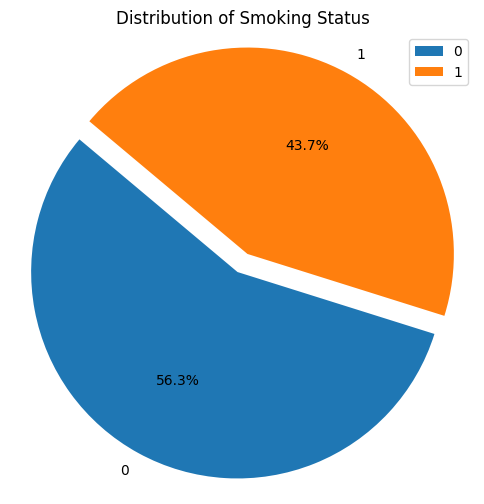

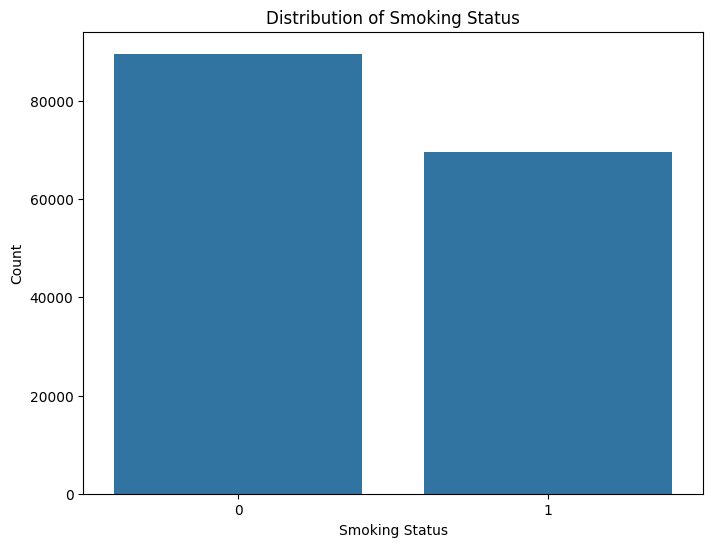

In [69]:
# 1. Visualize the distribution of 'smoking' using a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size for better readability
count_values = train_data['smoking'].value_counts()

# Create a pie chart with explode to emphasize slices
plt.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140, explode=(0, 0.1))
plt.title('Distribution of Smoking Status')
plt.axis('equal')  # Ensure the pie chart is displayed as a circle
plt.legend(count_values.index, loc="best")  # Add a legend for better understanding

# Display the counts of smoking status
print("Counts of Smoking Status:\n", count_values)

plt.show()

# 2. Visualize the distribution of 'smoking' using a count plot in Seaborn
plt.figure(figsize=(8, 6))  # Set figure size for better readability

# Create a count plot using Seaborn
sns.countplot(data=train_data, x='smoking')
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

# Display the counts of smoking status
count_values = train_data['smoking'].value_counts()

plt.show()

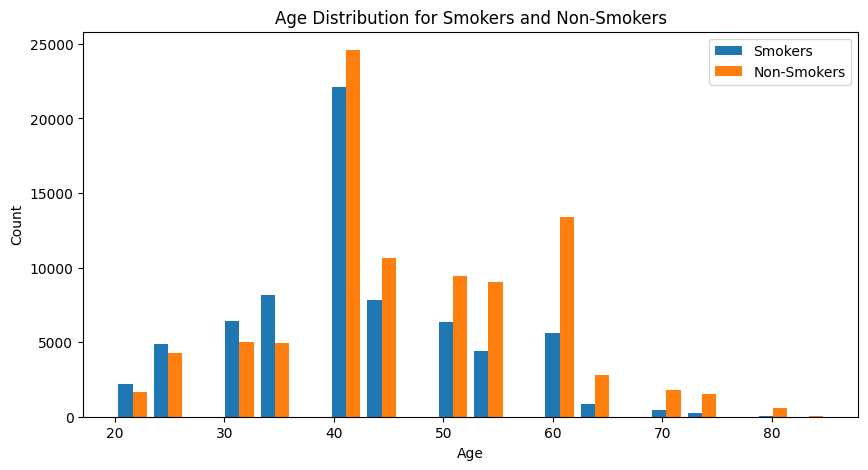

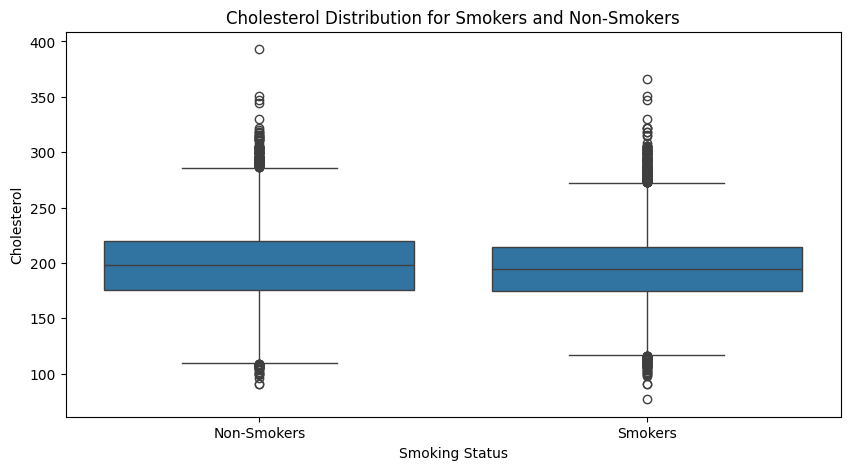

In [70]:
# Separate data into smokers and non-smokers
smokers = train_data[train_data['smoking'] == 1]
non_smokers = train_data[train_data['smoking'] == 0]

# Visualize using various plots
# For demonstration purposes, using a few common plots:

# 1. Histogram for Age
plt.figure(figsize=(10, 5))
plt.hist([smokers['age'], non_smokers['age']], bins=20, label=['Smokers', 'Non-Smokers'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.title('Age Distribution for Smokers and Non-Smokers')
plt.show()

# 2. Box Plot for Cholesterol
plt.figure(figsize=(10, 5))
sns.boxplot(x='smoking', y='Cholesterol', data=train_data)
plt.xlabel('Smoking Status')
plt.ylabel('Cholesterol')
plt.xticks([0, 1], ['Non-Smokers', 'Smokers'])
plt.title('Cholesterol Distribution for Smokers and Non-Smokers')
plt.show()

# # 3. Countplot for age distribution based on smoking status using seaborn
# plt.figure(figsize=(10, 5))
# sns.countplot(x='age', hue='smoking', data=train_data)
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Age Distribution for Smokers and Non-Smokers')
# plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
# plt.show()


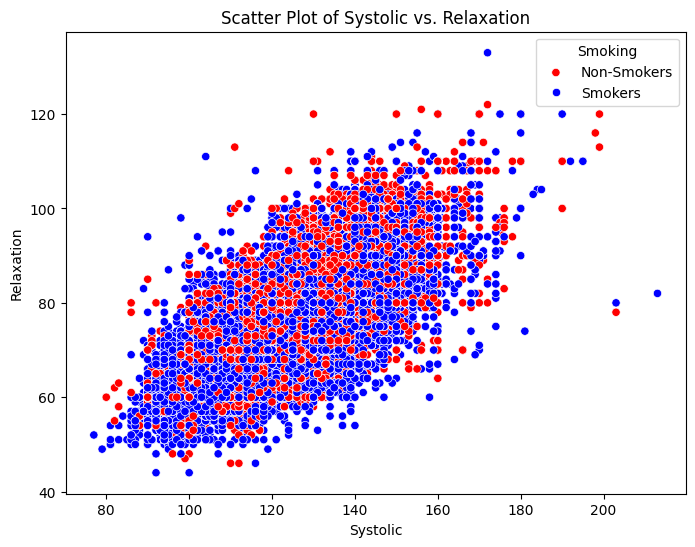

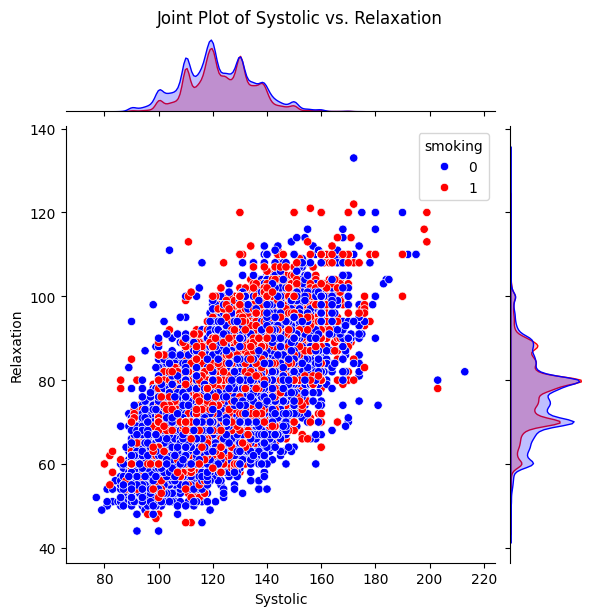

In [71]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='systolic', y='relaxation', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('Systolic')
plt.ylabel('Relaxation')
plt.title('Scatter Plot of Systolic vs. Relaxation')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='systolic', y='relaxation', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('Systolic')
plt.ylabel('Relaxation')
plt.suptitle('Joint Plot of Systolic vs. Relaxation', y=1.02)
plt.show()

C:\Users\yashr\AppData\Local\Temp\ipykernel_13708\2991513377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='dental caries', y='Gtp', data=train_data, palette='viridis')


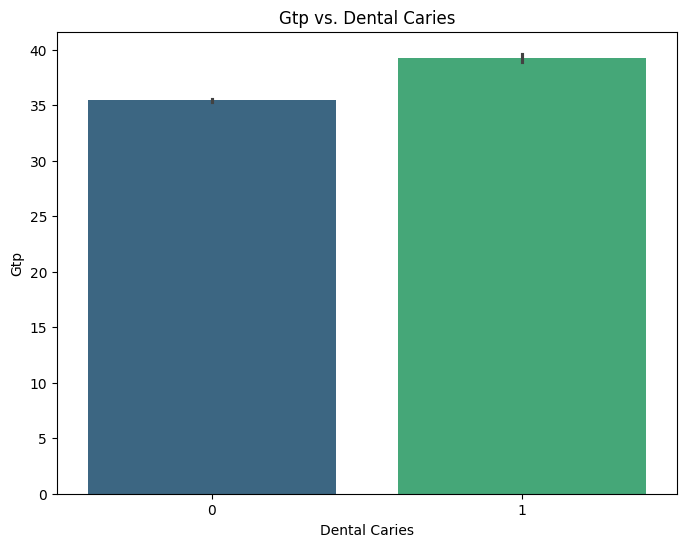

In [72]:
# Create a bar plot to visualize the relationship between the
# 'dental caries' variable (categorical) on the x-axis
# and the 'Gtp' variable (numeric) on the y-axis
plt.figure(figsize=(8, 6))
sns.barplot(x='dental caries', y='Gtp', data=train_data, palette='viridis')
plt.xlabel('Dental Caries')
plt.ylabel('Gtp')
plt.title('Gtp vs. Dental Caries')
plt.show()

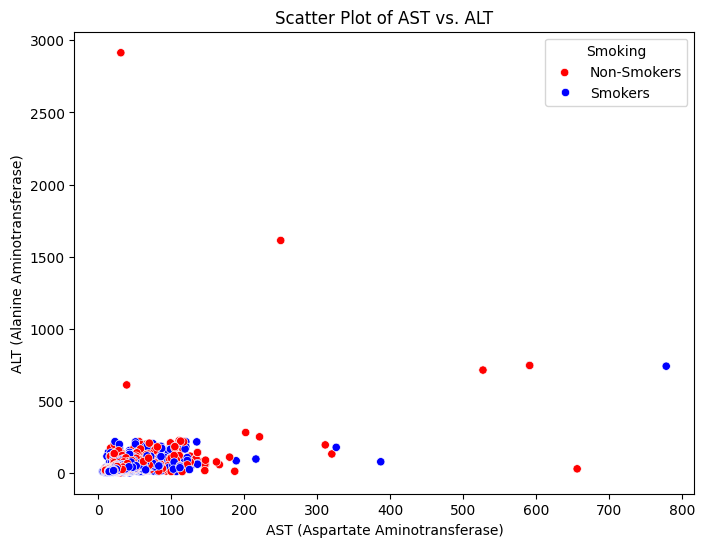

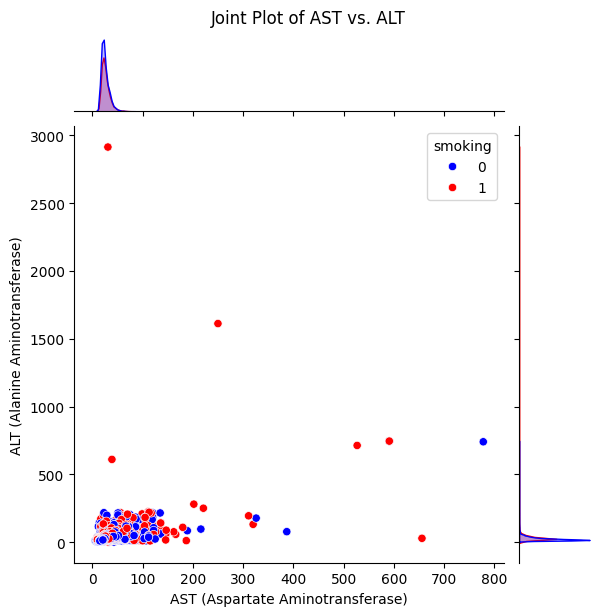

In [73]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AST', y='ALT', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('AST (Aspartate Aminotransferase)')
plt.ylabel('ALT (Alanine Aminotransferase)')
plt.title('Scatter Plot of AST vs. ALT')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='AST', y='ALT', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('AST (Aspartate Aminotransferase)')
plt.ylabel('ALT (Alanine Aminotransferase)')
plt.suptitle('Joint Plot of AST vs. ALT', y=1.02)
plt.show()

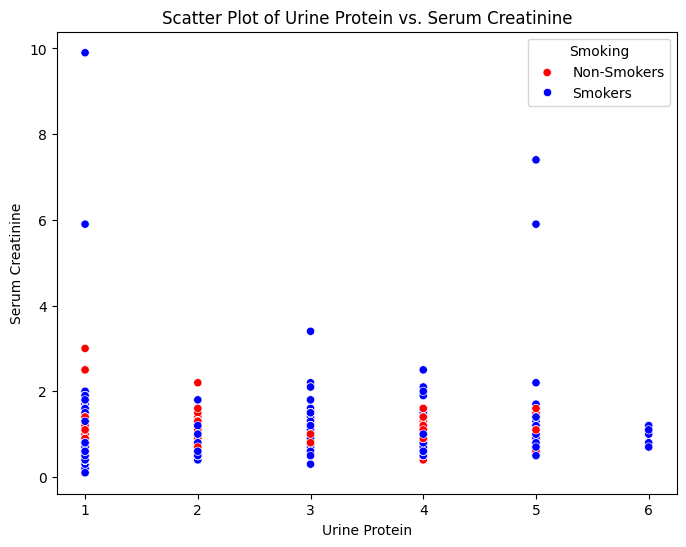

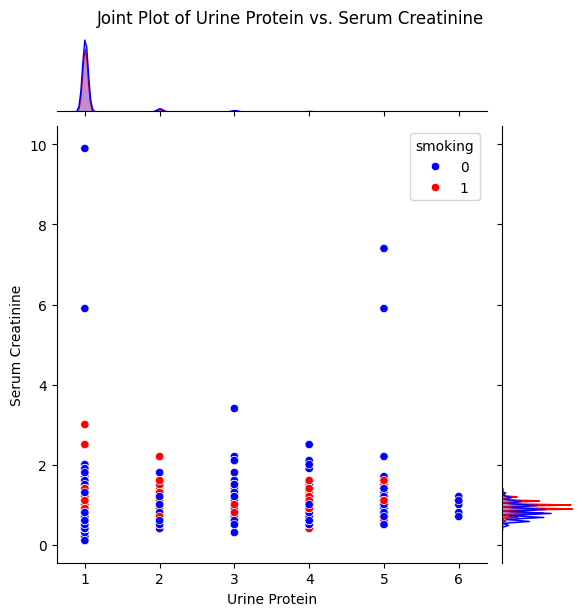

In [74]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Urine protein', y='serum creatinine', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('Urine Protein')
plt.ylabel('Serum Creatinine')
plt.title('Scatter Plot of Urine Protein vs. Serum Creatinine')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='Urine protein', y='serum creatinine', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('Urine Protein')
plt.ylabel('Serum Creatinine')
plt.suptitle('Joint Plot of Urine Protein vs. Serum Creatinine', y=1.02)
plt.show()

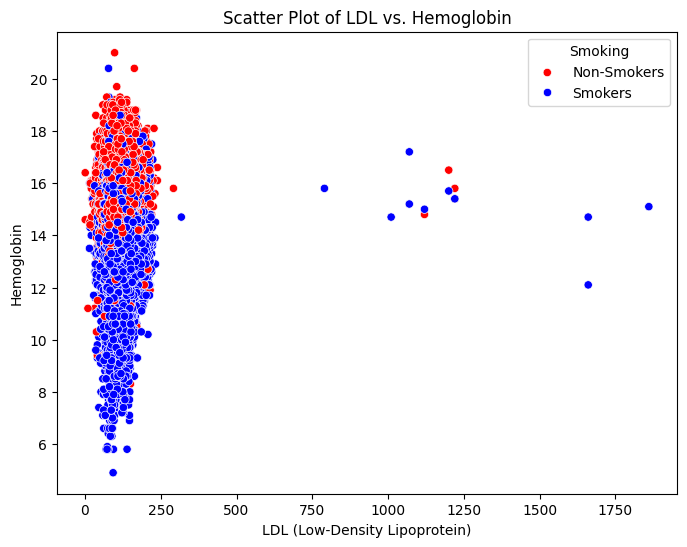

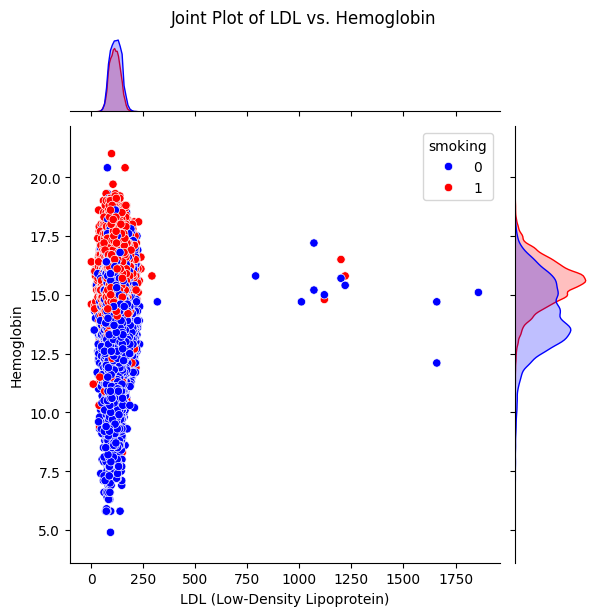

In [75]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDL', y='hemoglobin', data=train_data, hue='smoking', palette=['blue', 'red'])
plt.xlabel('LDL (Low-Density Lipoprotein)')
plt.ylabel('Hemoglobin')
plt.title('Scatter Plot of LDL vs. Hemoglobin')
plt.legend(title='Smoking', labels=['Non-Smokers', 'Smokers'])
plt.show()

# Joint Plot (includes histograms)
sns.jointplot(x='LDL', y='hemoglobin', data=train_data, kind='scatter', hue='smoking', palette=['blue', 'red'])
plt.xlabel('LDL (Low-Density Lipoprotein)')
plt.ylabel('Hemoglobin')
plt.suptitle('Joint Plot of LDL vs. Hemoglobin', y=1.02)
plt.show()

In [76]:
# pair_plot_cols=[f for f in train_data.columns if train_data[f].nunique()>100]
# print(pair_plot_cols)
# sns.set(font_scale=1)
# plt.figure(figsize=(18, 10))
# sns.set(style="ticks", color_codes=True)
# sns.pairplot(data=train_data, vars=pair_plot_cols,diag_kind='kde', 
#         kind='scatter', palette='muted', 
#         plot_kws={'s': 20}, hue='smoking')
# plt.show()

In [77]:
from prettytable import PrettyTable
from itertools import combinations

correlation_matrix = train_to_scale.corr()


table = PrettyTable()
table.field_names = ["Column 1", "Column 2", "Correlation"]


for col1, col2 in combinations(correlation_matrix.columns, 2):
    correlation = correlation_matrix.at[col1, col2]
    table.add_row([col1, col2, f"{correlation:.2f}"])
table.sortby = "Correlation"

print(table)

+---------------------+---------------------+-------------+
|       Column 1      |       Column 2      | Correlation |
+---------------------+---------------------+-------------+
|     Cholesterol     |    eyesight_diff    |    -0.00    |
|         LDL         |    eyesight_diff    |    -0.00    |
| fasting blood sugar |    eyesight_diff    |    -0.00    |
|      height(cm)     |    eyesight_diff    |    -0.00    |
|      hemoglobin     |    eyesight_diff    |    -0.00    |
|       systolic      |    eyesight_diff    |    -0.00    |
|     triglyceride    |    eyesight_diff    |    -0.00    |
|         ALT         |    eyesight_diff    |    -0.01    |
|         AST         |    eyesight_diff    |    -0.01    |
|     Cholesterol     |   serum creatinine  |    -0.01    |
|         Gtp         |    eyesight_diff    |    -0.01    |
|      relaxation     |    eyesight_diff    |    -0.01    |
|      weight(kg)     |    eyesight_diff    |    -0.01    |
|         age         |     triglyceride